In [5]:
import sys
import matplotlib.pyplot as plt
import scipy.stats
import math
import numpy as np
import subprocess

In [6]:
# path to the reference pfm, starting from the tools/img/ folder
reference="../../../referenz_normal/testrender_32768spp_fb00.pfm"
# base path to compared images, cutting off before the xxxspp_fb00.pfm part
imgbases=[("../../../64x64pixelsvariance/testrender_", "64x64variance"), ("../../../64x64pixelsdbor/testrender_", "64x64dbor")]



# plot title
title="BDPT moll fmo"
# number of compared images, starting at 1spp, up to 2^{steps-1}spp
steps=12 #13=4096

In [7]:
def get_spp(imgfile):
    txt_file = imgfile + ".txt"
    with open(txt_file, "r") as f:
        lines = f.readlines()
        for l in lines:
            if "samples per pixel" in l:
                spp = int(l.split("pixel: ")[1].split(" ")[0])
                return spp

Reference: 32768 spp
[1, 2, 4, 8, 16, 32, 64, 128, 256, 512, 1024, 2048]
Reference: 32768 spp
[1, 2, 4, 8, 16, 32, 64, 128, 256, 512, 1024, 2048]


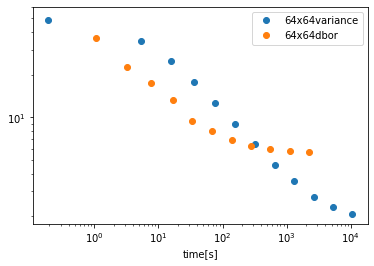

In [13]:
def computeRMSE(imgbase):
    spp = 1
    spps = []
    times = []
    rmses = []

    print("Reference: " + str(get_spp(reference)) + " spp")

    for i in range(0,steps):
        # compute rmse
        image = imgbase + str(spp) + "spp_fb00.pfm"
        imagetxt = imgbase + str(spp) + "spp_fb00.pfm.txt"
        process = subprocess.Popen("./pfmdiff " + reference + " " + image, shell=True, stdout=subprocess.PIPE, stderr=subprocess.PIPE)
        output, error = lines = process.communicate()
        if (len(error) > 0):
            print("Error:")
            print(error)
            break
        lines = output.splitlines()
        rr = str(lines[0]).split("rmse: ")[1][:-3]
        rmse = float(rr)

        with open(imagetxt, "r") as asdf:
            txtlines = asdf.readlines()
            for line in txtlines:
                if ("wallclock" in line):
                    a = (float)(line.split("wallclock prog ")[1].split("s")[0])
                    times.append(a)

        
        # append to list
        spps.append(spp)
        rmses.append(rmse)
        spp = spp*2
    return spps, rmses, times

for (imgbase, title) in imgbases:
    s,r,t = computeRMSE(imgbase)
    print(s)
    plt.loglog(t, r,"o", label=title)
    plt.xlabel("time[s]")
    #plt.loglog(s, r,"o", label=title)
# plot

##fake = [50/math.sqrt(float(s)) for s in spps]
#plt.loglog(spps, fake, label="some straight line")
plt.legend()
plt.savefig("test"+"rmse.pdf", bbox_inches="tight")